In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [78]:
df = pd.read_csv("../data/processed/model_data.csv", index_col=0)
print(df.shape)
df.head()

(11156, 13)


staining  Genome Length (bp)  Jumbophage  molGC (%)  Number CDS  \
Accession                                                                    
MN335248   negative                7045           0     60.298          13   
MK250029   negative              540217           1     25.796         830   
MK250028   negative              550053           1     26.012         859   
MK250027   negative              551627           1     26.022         860   
MK250026   negative              550702           1     26.020         859   

           Positive Strand (%)  Negative Strand (%)  Coding Capacity (%)  \
Accession                                                                  
MN335248             84.615385            15.384615            88.828957   
MK250029             47.108434            52.891566            68.324951   
MK250028             52.270081            47.729919            69.188424   
MK250027             53.023256            46.976744            69.318761   
MK250026             53.201397            46.798603            69.363285   

           tRNAs  Molecule_DNA  Molecule_RNA  Molecule_ss-DNA  Molecule_ss-RNA  
Accession                                                                       
MN335248       0             0             0                1                0  
MK250029      30             1             0                0                0  
MK250028      29             1             0                0                0  
MK250027      33             1             0                0                0  
MK250026      33             1             0                0                0

In [6]:
# Group by 'staining' and calculate summary statistics
summary_stats = df.groupby('staining').agg({
    'Genome Length (bp)': ['mean', 'std'],
    'Jumbophage': 'sum',
    'molGC (%)': ['mean', 'std'],
    'Number CDS': ['mean', 'std'],
    'Positive Strand (%)': ['mean', 'std'],
    'Negative Strand (%)': ['mean', 'std'],
    'Coding Capacity (%)': ['mean', 'std'],
    'tRNAs': 'sum',
    'Molecule_DNA': 'sum',
    'Molecule_RNA': 'sum',
    'Molecule_ss-DNA': 'sum',
    'Molecule_ss-RNA': 'sum'
})

# Display the summary statistics
summary_stats

Genome Length (bp)               Jumbophage  molGC (%)            \
                       mean           std        sum       mean       std   
staining                                                                    
negative       75664.753026  67118.170754        336  46.728729  8.646494   
positive       62867.192308  44227.578679         17  42.346065  9.972673   

          Number CDS             Positive Strand (%)             \
                mean         std                mean        std   
staining                                                          
negative  108.344175  101.703332           62.286176  31.766719   
positive   91.030397   60.540330           61.096686  25.544222   

         Negative Strand (%)            Coding Capacity (%)            tRNAs  \
                        mean        std                mean       std    sum   
staining                                                                       
negative           37.713824  31.766719           91.204655  5.121400  24725   
positive           38.903314  25.544222           90.596548  3.250634   9702   

         Molecule_DNA Molecule_RNA Molecule_ss-DNA Molecule_ss-RNA  
                  sum          sum             sum             sum  
staining                                                            
negative         7802           20             107               3  
positive         3222            1               1               0

## Scaling 

In [74]:
# Separate the 'staining' column with index
staining = df[['staining']].copy()

# Drop 'staining' column from numerical features
numerical_features = df.drop('staining', axis=1)

# Scale the numerical features
scaler = StandardScaler()
scaled_numerical_features = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

# Combine the scaled numerical features with the 'staining' column using the index
#scaled_data = pd.concat([staining, scaled_numerical_features], axis=1)

scaled_numerical_features['staining'] = staining['staining'].values

df = scaled_numerical_features
df.head()

Genome Length (bp)  Jumbophage  molGC (%)  Number CDS  Positive Strand (%)  \
0           -1.052977   -0.180765   1.601383   -0.981390             0.753173   
1            7.594683    5.532034  -2.122771    7.893861            -0.492770   
2            7.754216    5.532034  -2.099456    8.208895            -0.321305   
3            7.779745    5.532034  -2.098376    8.219758            -0.296286   
4            7.764742    5.532034  -2.098592    8.208895            -0.290368   

   Negative Strand (%)  Coding Capacity (%)     tRNAs  Molecule_DNA  \
0            -0.753173            -0.471448 -0.455994     -9.138662   
1             0.492770            -4.865425  3.976922      0.109425   
2             0.321305            -4.680384  3.829158      0.109425   
3             0.296286            -4.652453  4.420213      0.109425   
4             0.290368            -4.642911  4.420213      0.109425   

   Molecule_RNA  Molecule_ss-DNA  Molecule_ss-RNA  staining  
0     -0.043427        10.114163        -0.016401  negative  
1     -0.043427        -0.098871        -0.016401  negative  
2     -0.043427        -0.098871        -0.016401  negative  
3     -0.043427        -0.098871        -0.016401  negative  
4     -0.043427        -0.098871        -0.016401  negative

In [77]:
# Group by 'staining' and calculate summary statistics
summary_stats = df.groupby('staining').agg({
    'Genome Length (bp)': ['mean', 'std'],
    'Jumbophage': 'sum',
    'molGC (%)': ['mean', 'std'],
    'Number CDS': ['mean', 'std'],
    'Positive Strand (%)': ['mean', 'std'],
    'Negative Strand (%)': ['mean', 'std'],
    'Coding Capacity (%)': ['mean', 'std'],
    'tRNAs': 'sum',
    'Molecule_DNA': 'sum',
    'Molecule_RNA': 'sum',
    'Molecule_ss-DNA': 'sum',
    'Molecule_ss-RNA': 'sum'
})

# Display the summary statistics
summary_stats

Genome Length (bp)            Jumbophage molGC (%)            \
                       mean       std         sum      mean       std   
staining                                                                
negative           0.059985  1.088608  485.669872  0.136712  0.933304   
positive          -0.147582  0.717339 -485.669872 -0.336353  1.076453   

         Number CDS           Positive Strand (%)            \
               mean       std                mean       std   
staining                                                      
negative   0.054355  1.104826            0.011419  1.055258   
positive  -0.133729  0.657663           -0.028095  0.848553   

         Negative Strand (%)           Coding Capacity (%)            \
                        mean       std                mean       std   
staining                                                               
negative           -0.011419  1.055258            0.037660  1.097508   
positive            0.028095  0.848553           -0.092656  0.696606   

              tRNAs Molecule_DNA Molecule_RNA Molecule_ss-DNA Molecule_ss-RNA  
                sum          sum          sum             sum             sum  
staining                                                                       
negative  36.518917  -334.290681   116.939839       308.54789       52.876148  
positive -36.518917   334.290681  -116.939839      -308.54789      -52.876148

In [7]:
# Perform T-Test
t_statistic, p_value = stats.ttest_ind(df[df['staining'] == 'positive']['Jumbophage'],
                                       df[df['staining'] == 'negative']['Jumbophage'])

print('T-Test p-value:', p_value)

T-Test p-value: 2.8033755322506865e-24


In [8]:
# Perform Welch's t-test - used because the sample size of both groups is different
t_statistic, p_value = stats.ttest_ind(df[df['staining'] == 'positive']['Jumbophage'],
                                       df[df['staining'] == 'negative']['Jumbophage'], equal_var=False)

print('Welch\'s T-Test p-value:', p_value)

Welch's T-Test p-value: 7.150792784756907e-46


In [9]:
# Perform Welch's t-test - used because the sample size of both groups is different
t_statistic, p_value = stats.ttest_ind(df[df['staining'] == 'positive']['Genome Length (bp)'],
                                       df[df['staining'] == 'negative']['Genome Length (bp)'], equal_var=False)

print('Welch\'s T-Test p-value:', p_value)

Welch's T-Test p-value: 6.146373572049263e-32


# Plotting boxplots etc

In [43]:
# Split the dataset into two based on 'staining'
negative_data = df[df['staining'] == 'negative']
positive_data = df[df['staining'] == 'positive']


In [81]:
'''def boxplot_stat(feature):
    # Data to plot
    data_to_plot = [negative_data[feature], positive_data[feature]]
    labels = ['Negative', 'Positive']

    # Calculate statistics
    mean_values = [data.mean() for data in data_to_plot]
    median_values = [data.median() for data in data_to_plot]
    std_values = [data.std() for data in data_to_plot]

    # Create a boxplot with customized aesthetics
    plt.figure(figsize=(10, 6))

    # Adding some style and color
    boxplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Customize the outliers
    for flier in boxplot['fliers']:
        flier.set(marker='+', color='gray', alpha=0.5, markersize=6)

    # Adding grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding labels and title
    plt.title(feature, fontsize=16)
    plt.xlabel('Staining', fontsize=14)
    plt.ylabel(feature, fontsize=14)

    # Customize x-axis and y-axis labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adding mean, median, and std annotations
    for i in range(len(labels)):
        plt.text(i + 0.7, mean_values[i], f'Mean: {mean_values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
        plt.text(i + 0.7, median_values[i], f'Median: {median_values[i]:.2f}', ha='center', va='center', fontsize=10, color='green')
        plt.text(i + 0.7, mean_values[i] + std_values[i], f'Std: {std_values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='red')

    # Show the plot
    plt.show()'''

def boxplot_stat(feature, df):
    # Split the dataset based on 'staining'
    negative_data = df[df['staining'] == 'negative']
    positive_data = df[df['staining'] == 'positive']

    # Data to plot
    data_to_plot = [negative_data[feature], positive_data[feature]]
    labels = ['Negative', 'Positive']

    # Calculate statistics
    mean_values = [data.mean() for data in data_to_plot]
    median_values = [data.median() for data in data_to_plot]
    std_values = [data.std() for data in data_to_plot]

    # Perform statistical test (t-test) between the two groups for the specified feature
    t_stat, p_val = stats.ttest_ind(negative_data[feature], positive_data[feature], equal_var=False)

    # Create a boxplot with customized aesthetics
    plt.figure(figsize=(10, 6))

    # Adding some style and color
    boxplot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Customize the outliers
    for flier in boxplot['fliers']:
        flier.set(marker='+', color='gray', alpha=0.5, markersize=6)

    # Adding grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding labels and title
    plt.title(feature, fontsize=16)
    plt.xlabel('Staining', fontsize=14)
    plt.ylabel(feature, fontsize=14)

    # Customize x-axis and y-axis labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Adding mean, median, and std annotations
    for i in range(len(labels)):
        plt.text(i + 0.7, mean_values[i], f'Mean: {mean_values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
        plt.text(i + 0.7, median_values[i], f'Median: {median_values[i]:.2f}', ha='center', va='center', fontsize=10, color='green')
        plt.text(i + 0.7, mean_values[i] + std_values[i], f'Std: {std_values[i]:.2f}', ha='center', va='bottom', fontsize=10, color='red')

    # Add significance markers based on p-value
    if p_val < 0.05:
        plt.text(1.5, max(mean_values) + max(std_values), '*', ha='center', va='top', fontsize=50)

    # Show the plot
    plt.show()


Genome Length

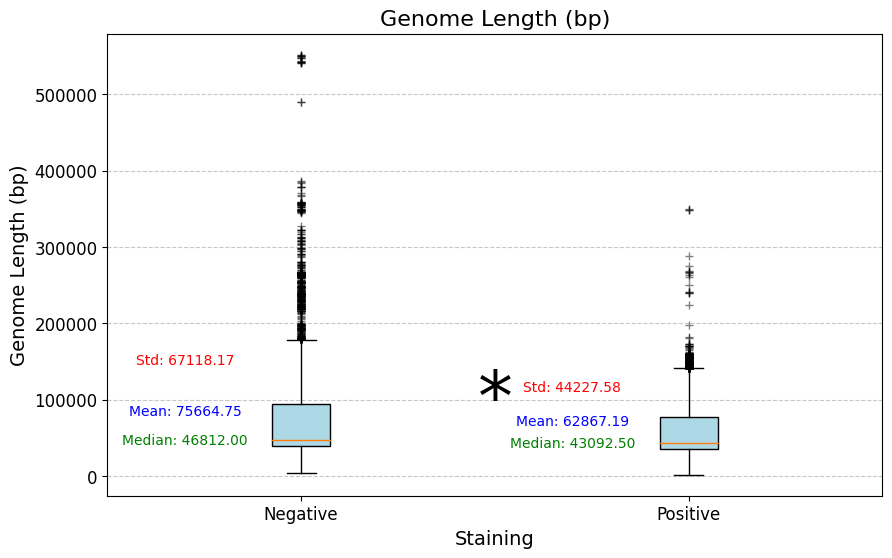

In [82]:
feature_to_plot = 'Genome Length (bp)'
boxplot_stat(feature_to_plot, df)

molGC (%)

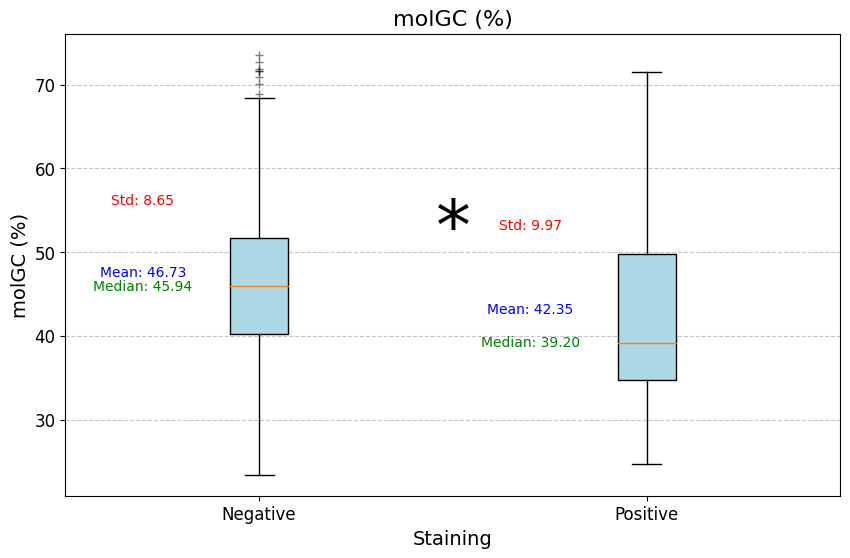

In [83]:
feature_to_plot = 'molGC (%)'
boxplot_stat(feature_to_plot, df)

Number of CDS

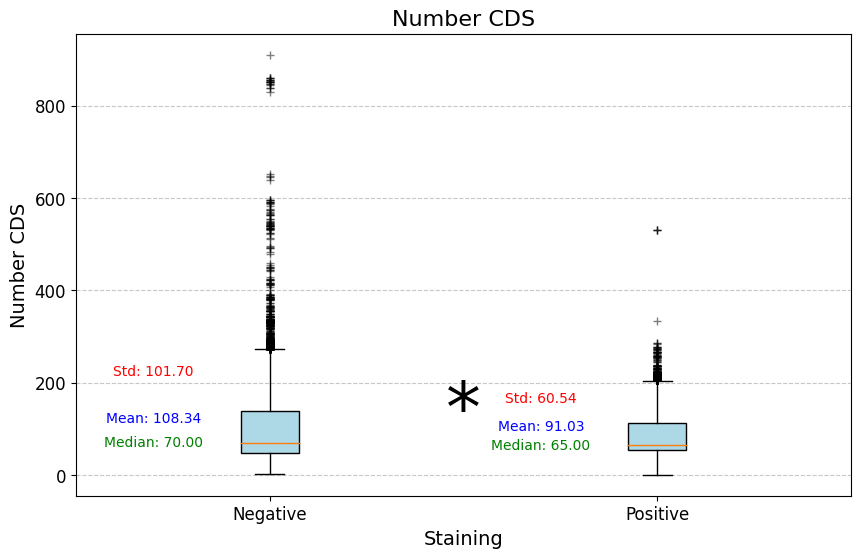

In [84]:
feature_to_plot = 'Number CDS'
boxplot_stat(feature_to_plot, df)

Coding Capacity (%)

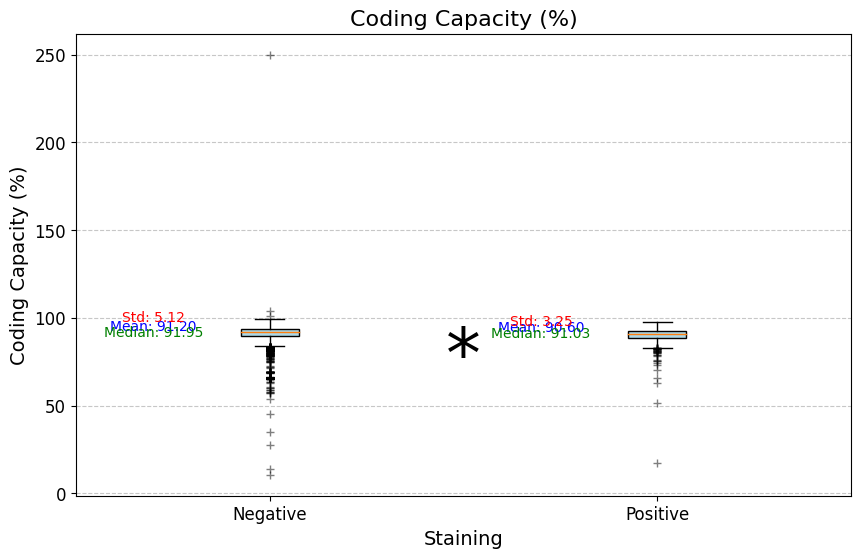

In [85]:
feature_to_plot = 'Coding Capacity (%)'
boxplot_stat(feature_to_plot, df)

In [44]:
# Calculate the lower and upper bounds for outliers
Q1 = negative_data['Coding Capacity (%)'].quantile(0.25)
Q3 = negative_data['Coding Capacity (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Retrieve the outlier data point
outlier_data = negative_data[(negative_data['Coding Capacity (%)'] > upper_bound)]

print("Outlier data point:")
outlier_data

Outlier data point:


staining  Genome Length (bp)  Jumbophage  molGC (%)  Number CDS  \
Accession                                                                    
MZ398245   negative               41384           0     52.921          82   
MZ047271   negative               51148           0     28.979         155   
MZ420230   negative               31962           0     51.740          46   

           Positive Strand (%)  Negative Strand (%)  Coding Capacity (%)  \
Accession                                                                  
MZ398245             60.975610            39.024390           103.590760   
MZ047271             70.967742            29.032258           249.890514   
MZ420230             86.956522            13.043478           101.088793   

           tRNAs  Molecule_DNA  Molecule_RNA  Molecule_ss-DNA  Molecule_ss-RNA  
Accession                                                                       
MZ398245       0             1             0                0                0  
MZ047271       6             1             0                0                0  
MZ420230       0             1             0                0                0

Positive and strand (%)

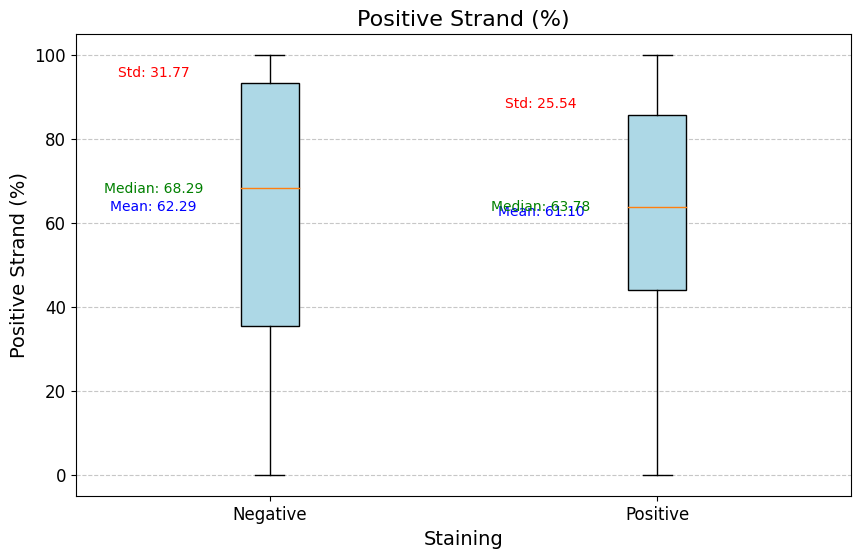

In [66]:
feature_to_plot = 'Positive Strand (%)'
boxplot_stat(feature_to_plot, df)

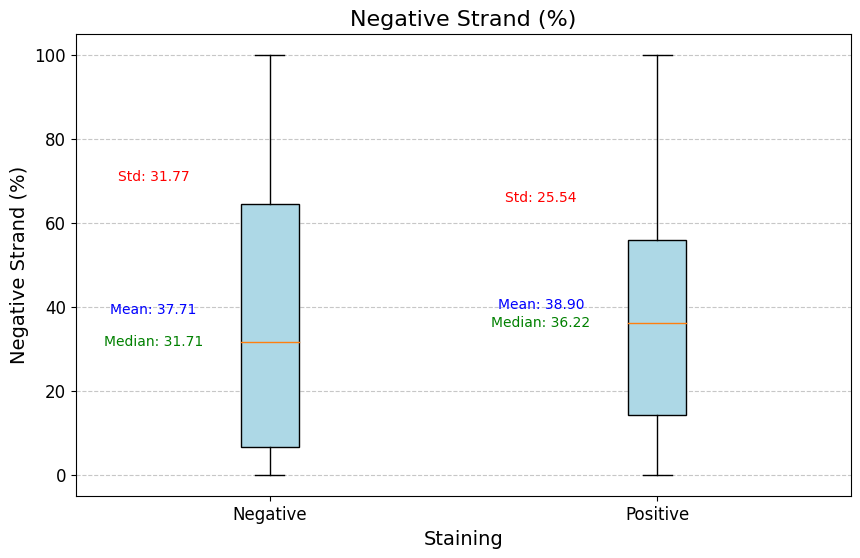

In [68]:
feature_to_plot = 'Negative Strand (%)'
boxplot_stat(feature_to_plot, df)

Number of tRNAs

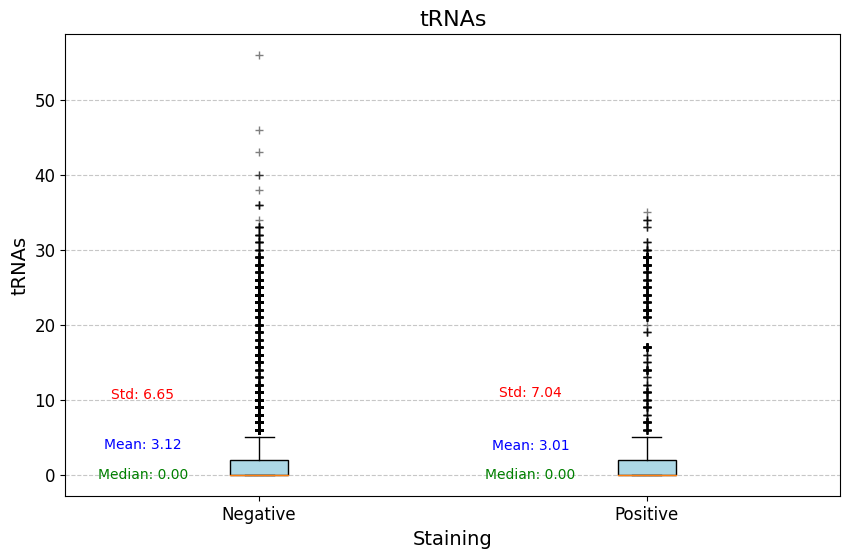

In [80]:
#median 0 indicates that more than half of the values are zero 
feature_to_plot = 'tRNAs'
boxplot_stat(feature_to_plot, df)

In [48]:
# Filter the DataFrame to obtain the row with index "EF380009"
desired_row = df.loc['EF380009']

print("Row corresponding to index EF380009:")
print(desired_row)

Row corresponding to index EF380009:
staining                negative
Genome Length (bp)          5386
Jumbophage                     0
molGC (%)                 44.653
Number CDS                     6
Positive Strand (%)        100.0
Negative Strand (%)          0.0
Coding Capacity (%)    65.837356
tRNAs                          0
Molecule_DNA                   0
Molecule_RNA                   0
Molecule_ss-DNA                1
Molecule_ss-RNA                0
Name: EF380009, dtype: object


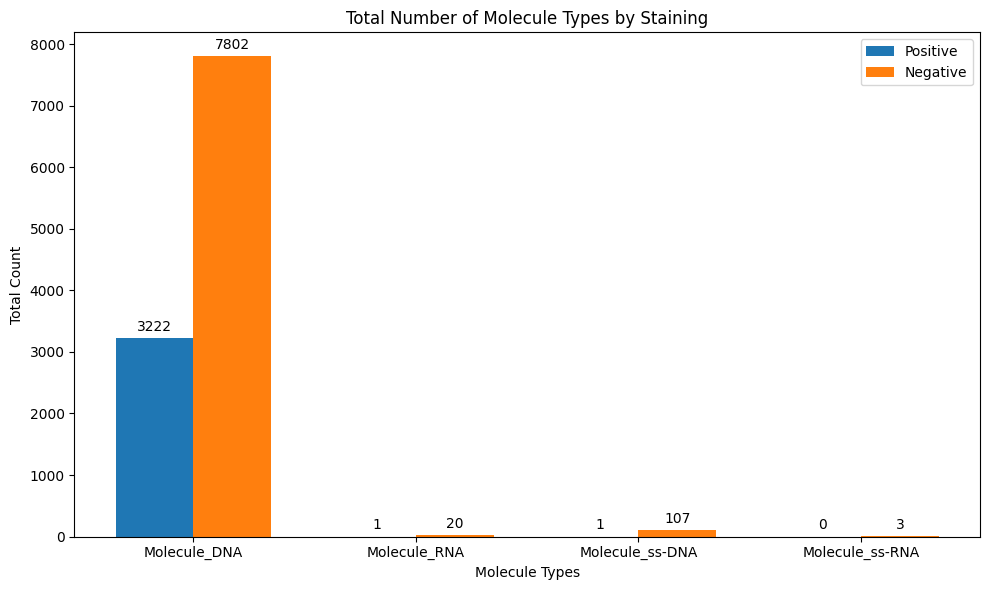

In [50]:
import numpy as np
# Group the data by 'staining' and sum the counts for each molecule type
molecule_counts = df.groupby('staining')[['Molecule_DNA', 'Molecule_RNA', 'Molecule_ss-DNA', 'Molecule_ss-RNA']].sum()

# Get the categories and positions for the bars
categories = molecule_counts.columns
positive_counts = molecule_counts.loc['positive']
negative_counts = molecule_counts.loc['negative']
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, positive_counts, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_counts, width, label='Negative')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Molecule Types')
ax.set_ylabel('Total Count')
ax.set_title('Total Number of Molecule Types by Staining')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add counts on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [71]:
negative_counts

Molecule_DNA       7802
Molecule_RNA         20
Molecule_ss-DNA     107
Molecule_ss-RNA       3
Name: negative, dtype: int64

# Principal component analysis

In [31]:
# Extract features and target variable
X = df.drop('staining', axis=1)  # Features
y = df['staining']  # Target variable

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Calculate the percentage of variance explained by each PC
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'staining' information by aligning the index
pca_df['staining'] = y.values  # Assign the values to ensure correct alignment



In [ ]:
# Plot the biplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)')
ax.set_title('Biplot of the First Two Principal Components Colored by Staining')

# Plot the samples colored by staining
for staining, color in zip(['positive', 'negative'], ['blue', 'red']):
    indices = pca_df['staining'] == staining
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, label=staining, alpha=0.3)

# Plot feature arrows with smaller size
arrow_scale = 0.2  # Adjust this to change the size of the arrows
for i, feature in enumerate(X.columns):
    ax.arrow(0, 0, pca.components_[0, i]*arrow_scale, pca.components_[1, i]*arrow_scale, 
             head_width=0.1, head_length=0.1, linewidth=1, color='k', alpha=0.5)
    ax.text(pca.components_[0, i]*arrow_scale*1.2, pca.components_[1, i]*arrow_scale*1.2, 
            feature, ha='center', va='center')

ax.legend()
plt.show()

# t SNE

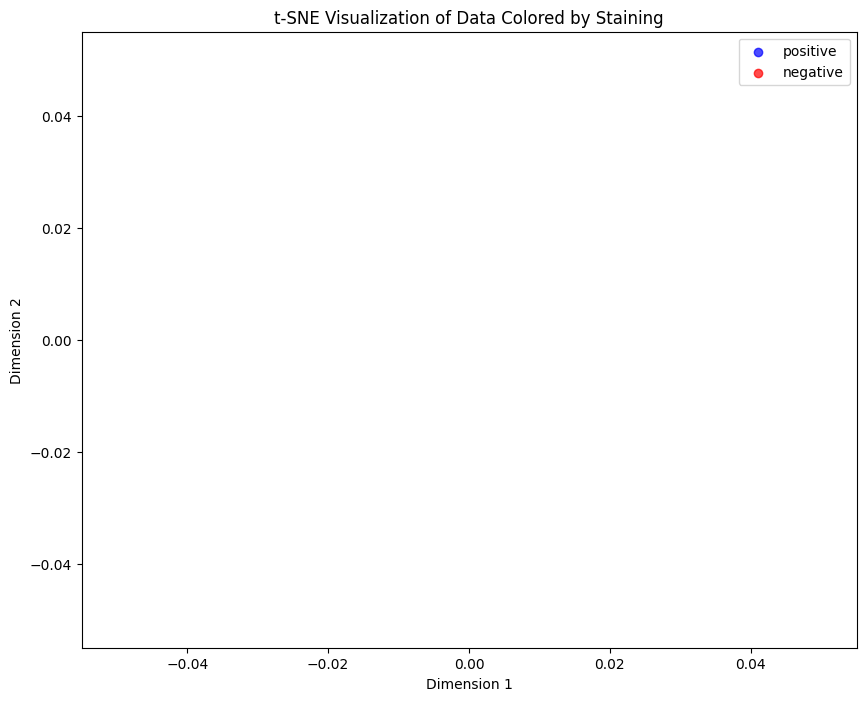

In [35]:
# Extract features and target variable
X = df.drop('staining', axis=1)  # Features
y = df['staining']  # Target variable

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_std)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['staining'] = y.values  # Assign the 'staining' information


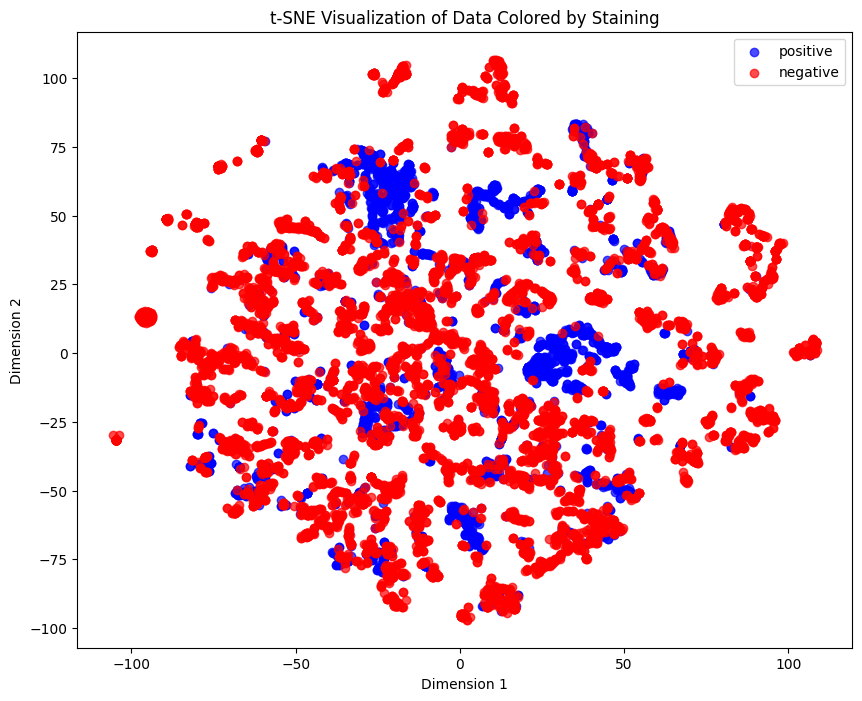

In [36]:

# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('t-SNE Visualization of Data Colored by Staining')

# Plot the samples colored by staining
for staining, color in zip(['positive', 'negative'], ['blue', 'red']):
    indices = tsne_df['staining'] == staining
    ax.scatter(tsne_df.loc[indices, 'Dimension 1'], tsne_df.loc[indices, 'Dimension 2'], c=color, label=staining, alpha=0.7)

ax.legend()
plt.show()

# Self organizing map

In [41]:
from minisom import MiniSom
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


data = pd.read_csv("../data/processed/model_data.csv", index_col=0)


# Convert relevant columns to numeric (if they're not already)
numeric_columns = ['Genome Length (bp)', 'Jumbophage', 'molGC (%)', 'Number CDS',
                   'Positive Strand (%)', 'Negative Strand (%)', 'Coding Capacity (%)', 'tRNAs']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or non-numeric values
data.dropna(subset=numeric_columns, inplace=True)

# Normalize the relevant numeric columns
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].min()) / \
                         (data[numeric_columns].max() - data[numeric_columns].min())

# Encode 'staining' to numerical values (assuming 'positive' as 1 and 'negative' as 0)
data['staining'] = data['staining'].apply(lambda x: 1 if x == 'positive' else 0)

# Extract features and target
features = data.values
target = data['staining'].values


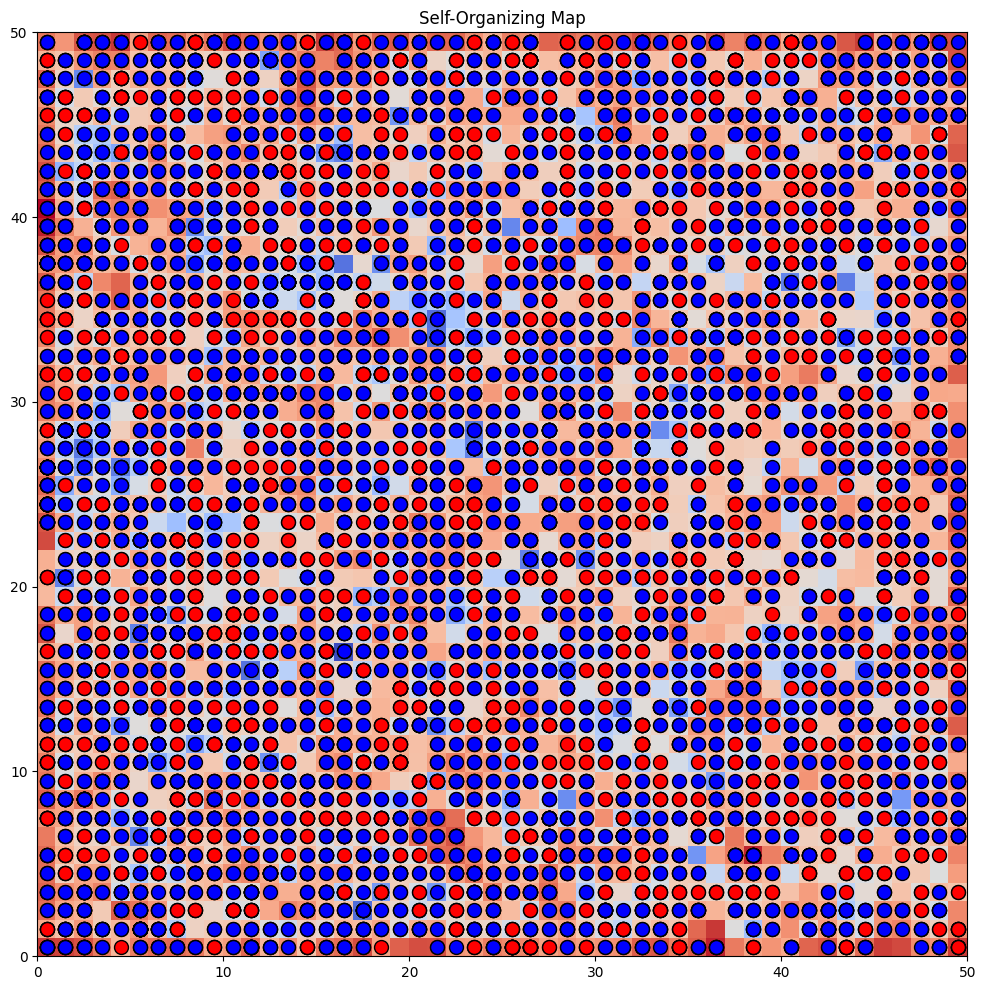

In [42]:
# Set the SOM grid dimensions (adjust as needed)
som_grid_rows = 50
som_grid_cols = 50

# Train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, features.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(features)
som.train_random(features, 100)

# Create a SOM grid
som_grid = som.get_weights()

# Assign colors based on 'staining' for visualization
colors = ['r' if t == 1 else 'b' for t in target]

# Visualization of the SOM with color-coded points based on 'staining'
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm_r')  # distance map as background
for i, x in enumerate(features):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0]+0.5, w[1]+0.5, colors[i], marker='o', markersize=10, markeredgecolor='k', markeredgewidth=1)
plt.title('Self-Organizing Map')
plt.show()


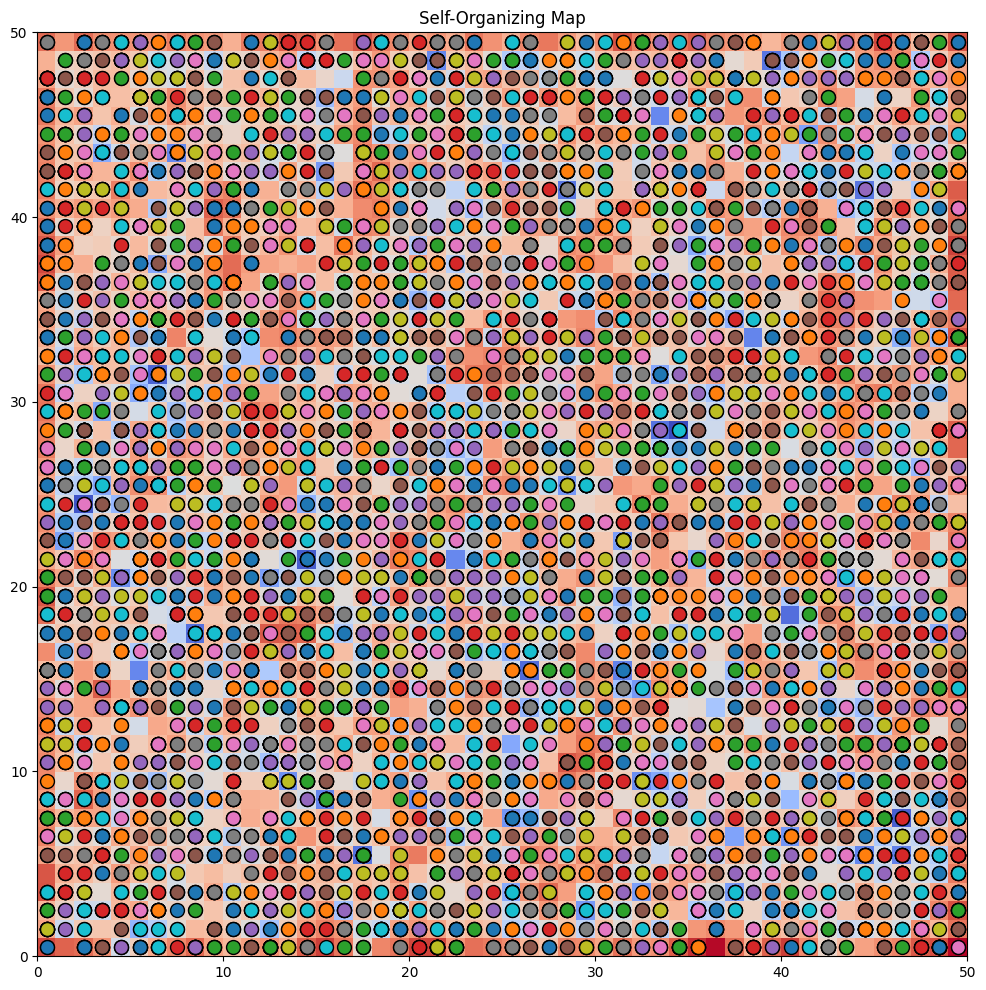

In [45]:
# Set the SOM grid dimensions (adjust as needed)
som_grid_rows = 50
som_grid_cols = 50

# Train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, features.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(features)
som.train_random(features, 1000)

# Create a SOM grid
som_grid = som.get_weights()

# Assign colors based on 'staining' for visualization
colors = ['r' if t == 1 else 'b' for t in target]

# Visualization of the SOM with color-coded points based on 'staining'
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm_r')  # distance map as background
for i, x in enumerate(features):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0]+0.5, w[1]+0.5, marker='o', markersize=10, markeredgecolor='k', markeredgewidth=1)
plt.title('Self-Organizing Map')
plt.show()


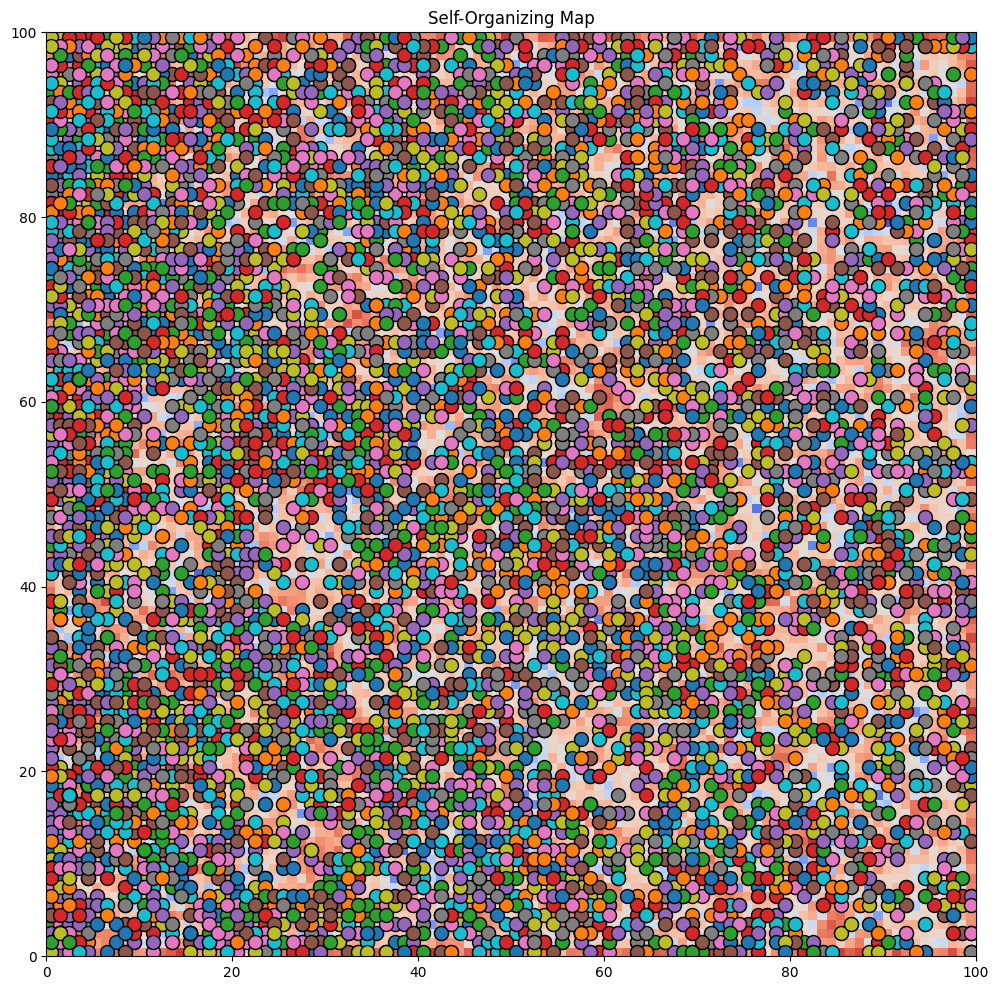

In [46]:
# Set the SOM grid dimensions (adjust as needed)
som_grid_rows = 100
som_grid_cols = 100

# Train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, features.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(features)
som.train_random(features, 100)

# Create a SOM grid
som_grid = som.get_weights()

# Assign colors based on 'staining' for visualization
colors = ['r' if t == 1 else 'b' for t in target]

# Visualization of the SOM with color-coded points based on 'staining'
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm_r')  # distance map as background
for i, x in enumerate(features):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0]+0.5, w[1]+0.5, marker='o', markersize=10, markeredgecolor='k', markeredgewidth=1)
plt.title('Self-Organizing Map')
plt.show()


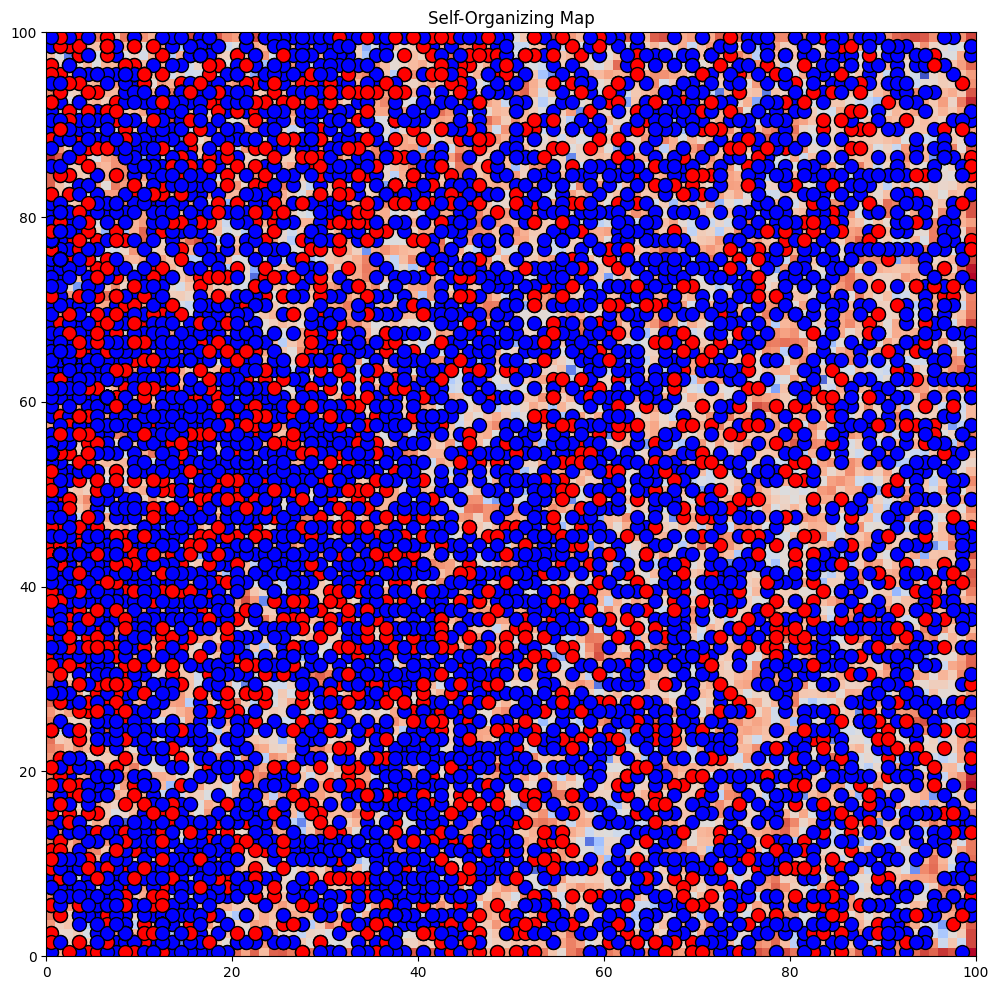

In [47]:
# Set the SOM grid dimensions (adjust as needed)
som_grid_rows = 100
som_grid_cols = 100

# Train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, features.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(features)
som.train_random(features, 100)

# Create a SOM grid
som_grid = som.get_weights()

# Assign colors based on 'staining' for visualization
colors = ['r' if t == 1 else 'b' for t in target]

# Visualization of the SOM with color-coded points based on 'staining'
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm_r')  # distance map as background
for i, x in enumerate(features):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0]+0.5, w[1]+0.5, colors[i], marker='o', markersize=10, markeredgecolor='k', markeredgewidth=1)
plt.title('Self-Organizing Map')
plt.show()


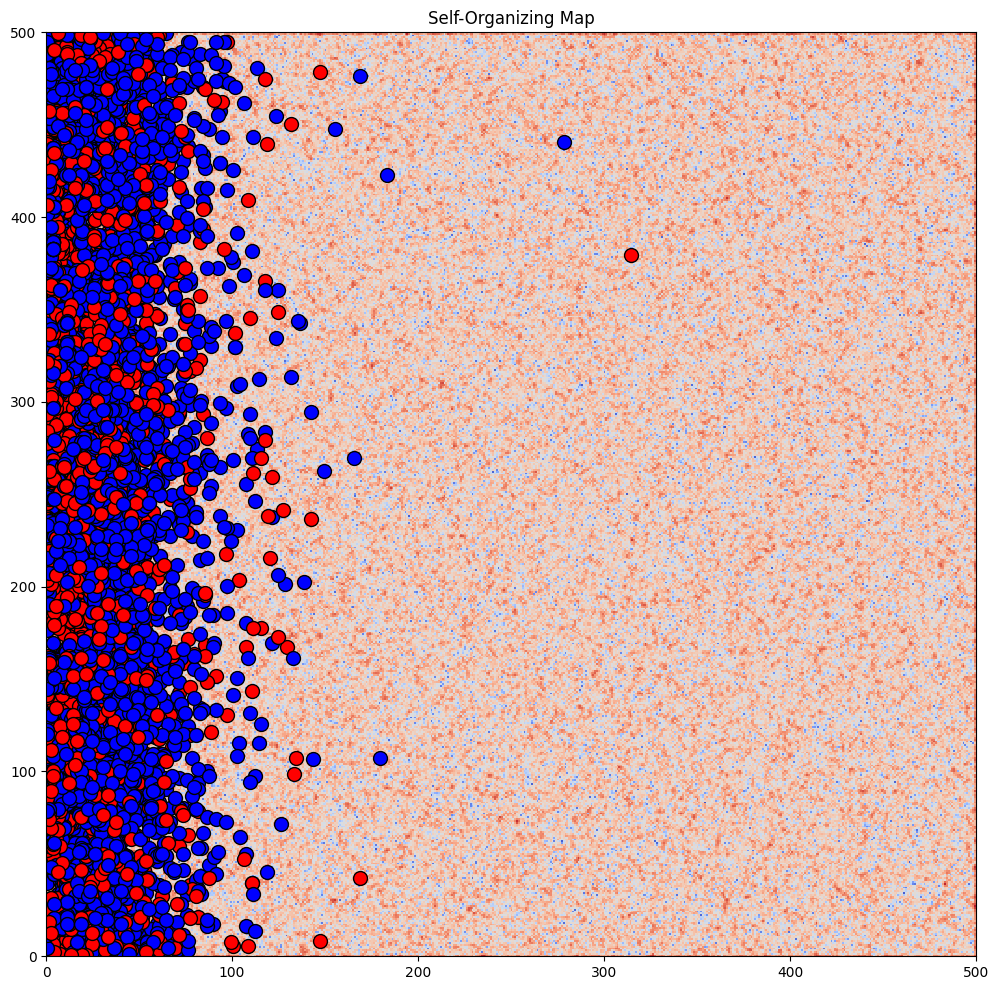

In [43]:
# Set the SOM grid dimensions (adjust as needed)
som_grid_rows = 500
som_grid_cols = 500

# Train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, features.shape[1], sigma=0.3, learning_rate=0.5)
som.random_weights_init(features)
som.train_random(features, 100)

# Create a SOM grid
som_grid = som.get_weights()

# Assign colors based on 'staining' for visualization
colors = ['r' if t == 1 else 'b' for t in target]

# Visualization of the SOM with color-coded points based on 'staining'
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm_r')  # distance map as background
for i, x in enumerate(features):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0]+0.5, w[1]+0.5, colors[i], marker='o', markersize=10, markeredgecolor='k', markeredgewidth=1)
plt.title('Self-Organizing Map')
plt.show()
